1. Ülkelerin Kazandığı Altın Madalya Sayısı
2. Yarışmacıların Kazandığı Madalya Sayısı
3. Belirli Bir Dalda Yarışan Sporcuların Boy-Kilo Ortalaması
4. Spor Dallarına Göre Kadın-Erkek Oranı
5. Belli Bir Spor Dalında Katılımcıların Kazandığı Madalya Sayısı
6. Yaz ve Kış Olimpiyat Sezonlarına Göre Olimpiyatlarda Kazanılan Madalya Durumları 
7. Yıllara Göre Katılımcıların Cinsiyet Durumu
8. Birkaç Farklı Filtreleme İşlemleri

## Veri Seti Hakkında Bilgi Edinme

* ID - Her sporcu için benzersiz numara, kimlik gibi düşünülebilir.
* Name - Sporcunun adı ve soyadı bilgis bir aradadır.
* Sex - M ya da F --> M: Male(Erkek) & F: Female(Kadın)
* Age - Yaş Bilgisi (Tamsayı olarak)
* Height - Santimetre Cinsinden
* Weight - Kilogram Cinsinden
* Team - Takım Adı
* NOC - Ulusal Olimpiyat Komitesi 3 harfli kod (Örn: Turkey-> TUR)
* Games - Yıl ve Olimpiyat Oyununun Sezonu 
* Year - Oynanılan Yıl (Tamsayı olarak)(Örn: 1912, 2014)
* Season - Summer ya da Winter (Oynanılan Olimpiyat Sezonu (Yaz veya Kış Olimpiyatı))
* City - Olimpiyatlara Ev Sahipliği Yapan Şehir
* Sport - Spor Dalı
* Event - Etkinlik (Basketbol dalında Erkeklerin Oynadığı Basketbol Oyunu)
* Medal - Gold, Silver, Bronze, ya da NaN (Altın, Gümüş, Bronz Madalyalar ve NaN yani boş değerlerden oluşan sütun)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import missingno as msn

* Veri setleri okundu.
* Veriler hakkında;
    - Sütun bilgilerini görmek için ilk 5 satırı okuduk.
    - Teblo içerisinde eksik bilgiler kontrol edildi. 
    - Doldurabilecek bilgiler ise dolduruldu. 

In [2]:
athletes = pd.read_csv("athlete_events.csv")
region = pd.read_csv("noc_regions.csv")
#bir sorun çıkması halinde esas veri değişmesin diye kopyaladığımız değişken veriler üzerinden gideceğiz.
athletes_copy = athletes.copy() 
region_copy = region.copy()

In [3]:
def dataCheck(df, head=5):

    # boyut bilgisi
    print("---------------------------- Satır-Sütun Bilgisi ----------------------------")
    print(df.shape)

    # info
    print("---------------------------- İnfo ----------------------------")
    print(df.info())

    #ilk 5 satır
    print("---------------------------- İlk 5 Satır ----------------------------")
    print(df.head(head))

    #Eksik değer sayısı kontrolü
    print("---------------------------- NA Değer Sayısı ----------------------------")
    print(df.isnull().sum())
    
dataCheck(athletes_copy)

---------------------------- Satır-Sütun Bilgisi ----------------------------
(271116, 15)
---------------------------- İnfo ----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB
None
--------------------

In [4]:
athletes_copy = athletes_copy.drop(["ID","Games"],axis = 1) 
#ID ve Games sütunları silindi. Games sütunu Year ve Season sütunun birleşmesi olduğu için silindi.
athletes_copy.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN


In [5]:
athletes_copy.describe().T #Veri seti içerisindeki sayısal değerleri olan sütunları analiz eder.

,count,mean,std,min,25%,50%,75%,max
Age,261642.0,25.556898,6.393561,10.0,21.0,24.0,28.0,97.0
Height,210945.0,175.338970,10.518462,127.0,168.0,175.0,183.0,226.0
Weight,208241.0,70.702393,14.348020,25.0,60.0,70.0,79.0,214.0
Year,271116.0,1978.378480,29.877632,1896.0,1960.0,1988.0,2002.0,2016.0


In [6]:
print("Takım İsimleri:")
#Kaç tane unique takım var?
print(athletes_copy.Team.unique())
print("Uniqe Team Sayısı:", len(athletes_copy.Team.unique()))
print("-"*80)
print("\nVeri Seti İçindeki Yıllar:")
#Yılların sıralanmış hali
print(np.sort(athletes_copy.Year.unique()))
print("-"*80)
print("\nSpor Dalları:")
#Oynanan spor dalları listesi
print(athletes_copy.Sport.unique())
print("Oynanan Spor Dalı Sayısı:", len(athletes_copy.Sport.unique()))

Takım İsimleri:
['China' 'Denmark' 'Denmark/Sweden' ... 'Solos Carex' 'Dow Jones' 'Digby']
Uniqe Team Sayısı: 1184
--------------------------------------------------------------------------------

Veri Seti İçindeki Yıllar:
[1896 1900 1904 1906 1908 1912 1920 1924 1928 1932 1936 1948 1952 1956
 1960 1964 1968 1972 1976 1980 1984 1988 1992 1994 1996 1998 2000 2002
 2004 2006 2008 2010 2012 2014 2016]
--------------------------------------------------------------------------------

Spor Dalları:
['Basketball' 'Judo' 'Football' 'Tug-Of-War' 'Speed Skating'
 'Cross Country Skiing' 'Athletics' 'Ice Hockey' 'Swimming' 'Badminton'
 'Sailing' 'Biathlon' 'Gymnastics' 'Art Competitions' 'Alpine Skiing'
 'Handball' 'Weightlifting' 'Wrestling' 'Luge' 'Water Polo' 'Hockey'
 'Rowing' 'Bobsleigh' 'Fencing' 'Equestrianism' 'Shooting' 'Boxing'
 'Taekwondo' 'Cycling' 'Diving' 'Canoeing' 'Tennis' 'Modern Pentathlon'
 'Figure Skating' 'Golf' 'Softball' 'Archery' 'Volleyball'
 'Synchronized Swimming' 'Tabl

In [10]:
print(f"Katılan Toplam Ülke Sayısı: {len(athletes_copy.region.unique())}")

Katılan Toplam Ülke Sayısı: 206


In [7]:
print("'noc_region.csv' Veri Dosyasının:")
dataCheck(region_copy)

'noc_region.csv' Veri Dosyasının:
---------------------------- Satır-Sütun Bilgisi ----------------------------
(230, 3)
---------------------------- İnfo ----------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   NOC     230 non-null    object
 1   region  227 non-null    object
 2   notes   21 non-null     object
dtypes: object(3)
memory usage: 5.5+ KB
None
---------------------------- İlk 5 Satır ----------------------------
   NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN
---------------------------- NA Değer Sayısı ----------------------------
NOC         0
region      3
notes     209
dtype: int64


* noc_region verisindeki 'notes' sütununda 209 tane değerin boş olduğunu gördük. Bu oldukça yüksek bir oran olduğu için o sütunu siliyoruz.

In [8]:
region_copy.drop('notes', axis = 1 , inplace = True)
region_copy.head(3) #son haliyle yine ilk bir kaç satırı yazdıralım.

,NOC,region
0,AFG,Afghanistan
1,AHO,Curacao
2,ALB,Albania


* 'athlete_events' ve 'noc_region' dosyalarını 'NOC' verisi ortak sütunuyla birleştirdik.

In [9]:
athletes_copy = athletes_copy.merge(region_copy, on="NOC", how="left")
athletes_copy.head(2)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
0,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China
1,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China


## Eksik Veriler İçin İşlemler

In [11]:
#Olimpiyat oyunları ile ilgili verilen veri setindeki boş veya eksik alanların sayısı.
athletes_copy.isnull().sum()#Hangi sütunda kaç tane boş değer olduğunu gördük.

Name           0
Sex            0
Age         9474
Height     60171
Weight     62875
Team           0
NOC            0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     231333
region       370
dtype: int64

In [12]:
athletes_copy.duplicated(subset=None, keep='first').value_counts() #1385 verinin kendini tekrar ettiğini anlamış olduk.

False    269731
True       1385
dtype: int64

In [13]:
athletes_copy = athletes_copy.drop_duplicates() #duplicate yani kendini tekrar eden veriler silindi.

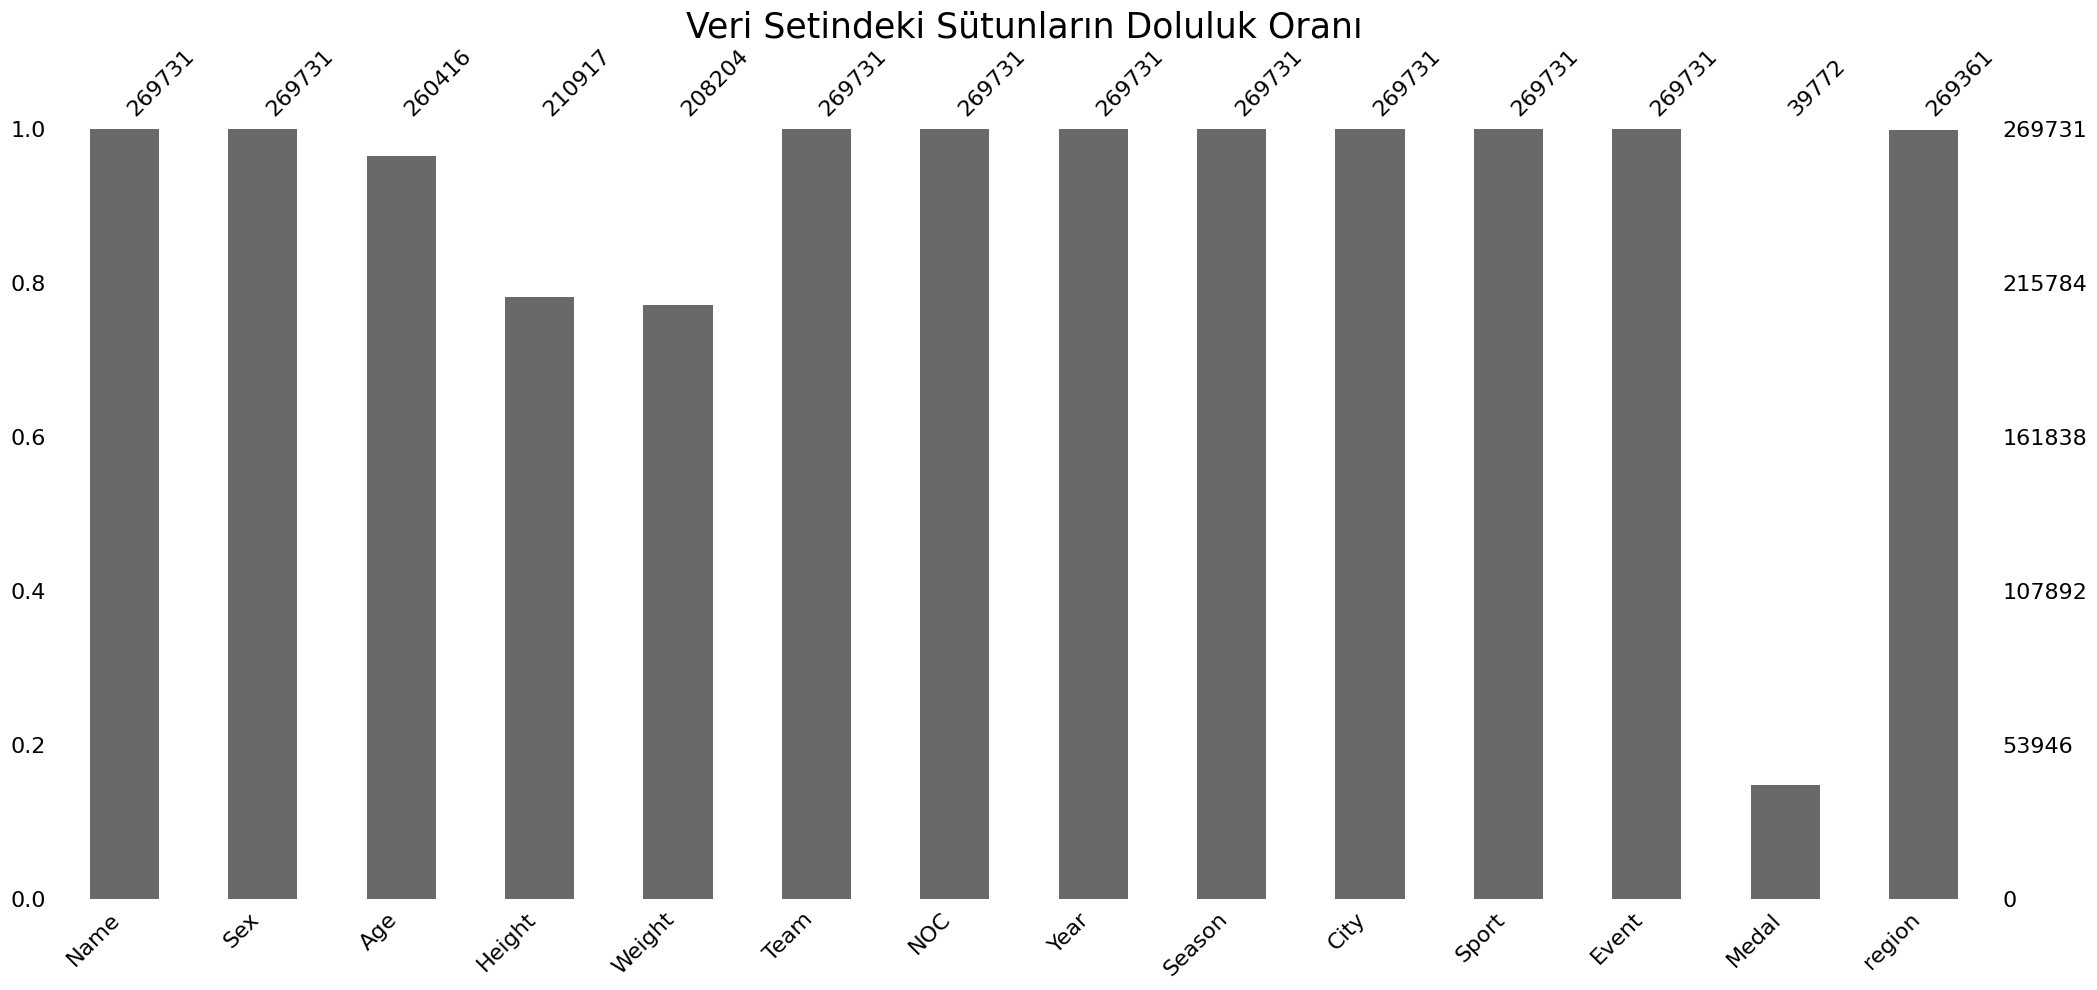

In [14]:
msn.bar(athletes_copy)
plt.title("Veri Setindeki Sütunların Doluluk Oranı", fontsize=25)
plt.show()

In [15]:
athletes_copy.isnull().sum()/athletes_copy.shape[0] *100


Name       0.000000
Sex        0.000000
Age        3.453441
Height    21.804687
Weight    22.810504
Team       0.000000
NOC        0.000000
Year       0.000000
Season     0.000000
City       0.000000
Sport      0.000000
Event      0.000000
Medal     85.254939
region     0.137174
dtype: float64

* Madalya sütunumuzda neredeyse %85.32'lik bir veri eksikliğimiz var. 'Medal' sütunu içinde 'Gold'-'Bronze'-'Silver' haricinde madalya olmadığı için bu kadar boş verinin olması bir yandan normal gözükebilir. Bu boş verileri 'Madalya yok' anlamında 'No Medal' şeklinde doldurduğumuzda çok elverişli bir analiz sonucu gözlemlenmiyor. Bu yüzden madalya alamayan sporcuları kaldırma yöntemini seçiyoruz.

In [17]:
medalChanges = athletes_copy["Medal"]
pd.isnull(medalChanges).sum()

229959

In [18]:
#isnull'un tersini notnull ile alarak eksik verileri filtreleyerek ayıklamış oluyoruz
madalya_degiskeni_filtresi = pd.notnull(medalChanges)

#filtreyi athletes_copy'ye uyguladığımızda True olan değerler yerinde kalırken False değerler veri setinden çıkarılıyor
athletes_copy = athletes_copy[madalya_degiskeni_filtresi]
athletes_copy.head() #yeni haliyle ilk 5 değerini yazdırıyoruz.

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
3,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark
37,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland
38,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland
40,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland


* 'Age' sütunumuzda yani yaş bilgisi sütunumuzda %3.49'luk bir veri eksiğimizin olduğunu görüyoruz. Bu boş verileri kaldırabiliriz ama çok fazla bir eksik oranı olmadığı için doldurmayı tercih ediyorum.

In [19]:
ortalama = np.mean(athletes_copy["Age"])
print("Yaş sütununun ortalaması:", ortalama)
yas = np.round_(ortalama) #numpy kütüphanesinin round_ komutuyla ondalık sayıyı tam sayıya çevirdik.
print("Doldurulacak yaş değeri:", yas) #Çıkan yaş ortalaması sonucuyla da 'Age' sütunundaki NaN değerler doldurulacak.

Yaş sütununun ortalaması: 25.923112386026023
Doldurulacak yaş değeri: 26.0


In [20]:
athletes_copy["Age"].fillna(yas)

3         34.0
37        30.0
38        30.0
40        28.0
41        28.0
          ... 
271078    25.0
271080    33.0
271082    28.0
271102    19.0
271103    23.0
Name: Age, Length: 39772, dtype: float64

* 'Weight' sütununda %23.19'luk ve 'Height' sütununda %22.19'luk NaN değerleri bulunmaktadır. Bu verileri doldurmak için şöyle bir yöntem deneyebiliriz;
    - Sporcuların yarıştıkları spor dalında, diğer sporcuların boy ve kilo ortalamalarına göre NaN değerler doldurulabilir.
* NaN değerlerini doldurmak için bu yöntemi de kullanamıyorum çünkü veri seti belirli ağırlıklara/boylara sahip sporculardan oluşuyor. Bu nedenle doğrudan boş verilerin bulunduğu satırları kaldırıyorum.

In [21]:
athletesW = athletes_copy["Weight"]
pd.isnull(athletesW).sum() #Weight sütunundaki boş değer sayısı


9316

In [22]:
agirlik = pd.notnull(athletesW) #Weight sütunundaki boş değerleri filtreleyerek yeni bir değişkene atama yapıyoruz.
athletes_copy = athletes_copy[agirlik] #Yeni atama yapılan değişkeni veri setimizde uyguluyoruz.

In [24]:
athletesH = athletes_copy["Height"]
pd.isnull(athletesH).sum() #Weight sütunundaki boş değer sayısı

260

In [25]:
uzunluk = pd.notnull(athletesH) #Weight sütunundaki boş değerleri filtreleyerek yeni bir değişkene atama yapıyoruz.
athletes_copy = athletes_copy[uzunluk] #Yeni atama yapılan değişkeni veri setimizde uyguluyoruz.

In [26]:
athletes_copy.isnull().sum() 
# Madalya alamayan sporcular kaldırılığında,
# 'Age' sütunundaki NaN değerlerini, sütunun ortalamasıyla doldurduğumuzda,
# 'Weight' ve 'Height' sütunlarındaki NaN değerler de kaldırıldığında
#  veri setimiz içinde ne kadar eksik veri kalmış onu göreceğiz.

Name       0
Sex        0
Age       15
Height     0
Weight     0
Team       0
NOC        0
Year       0
Season     0
City       0
Sport      0
Event      0
Medal      0
region     9
dtype: int64

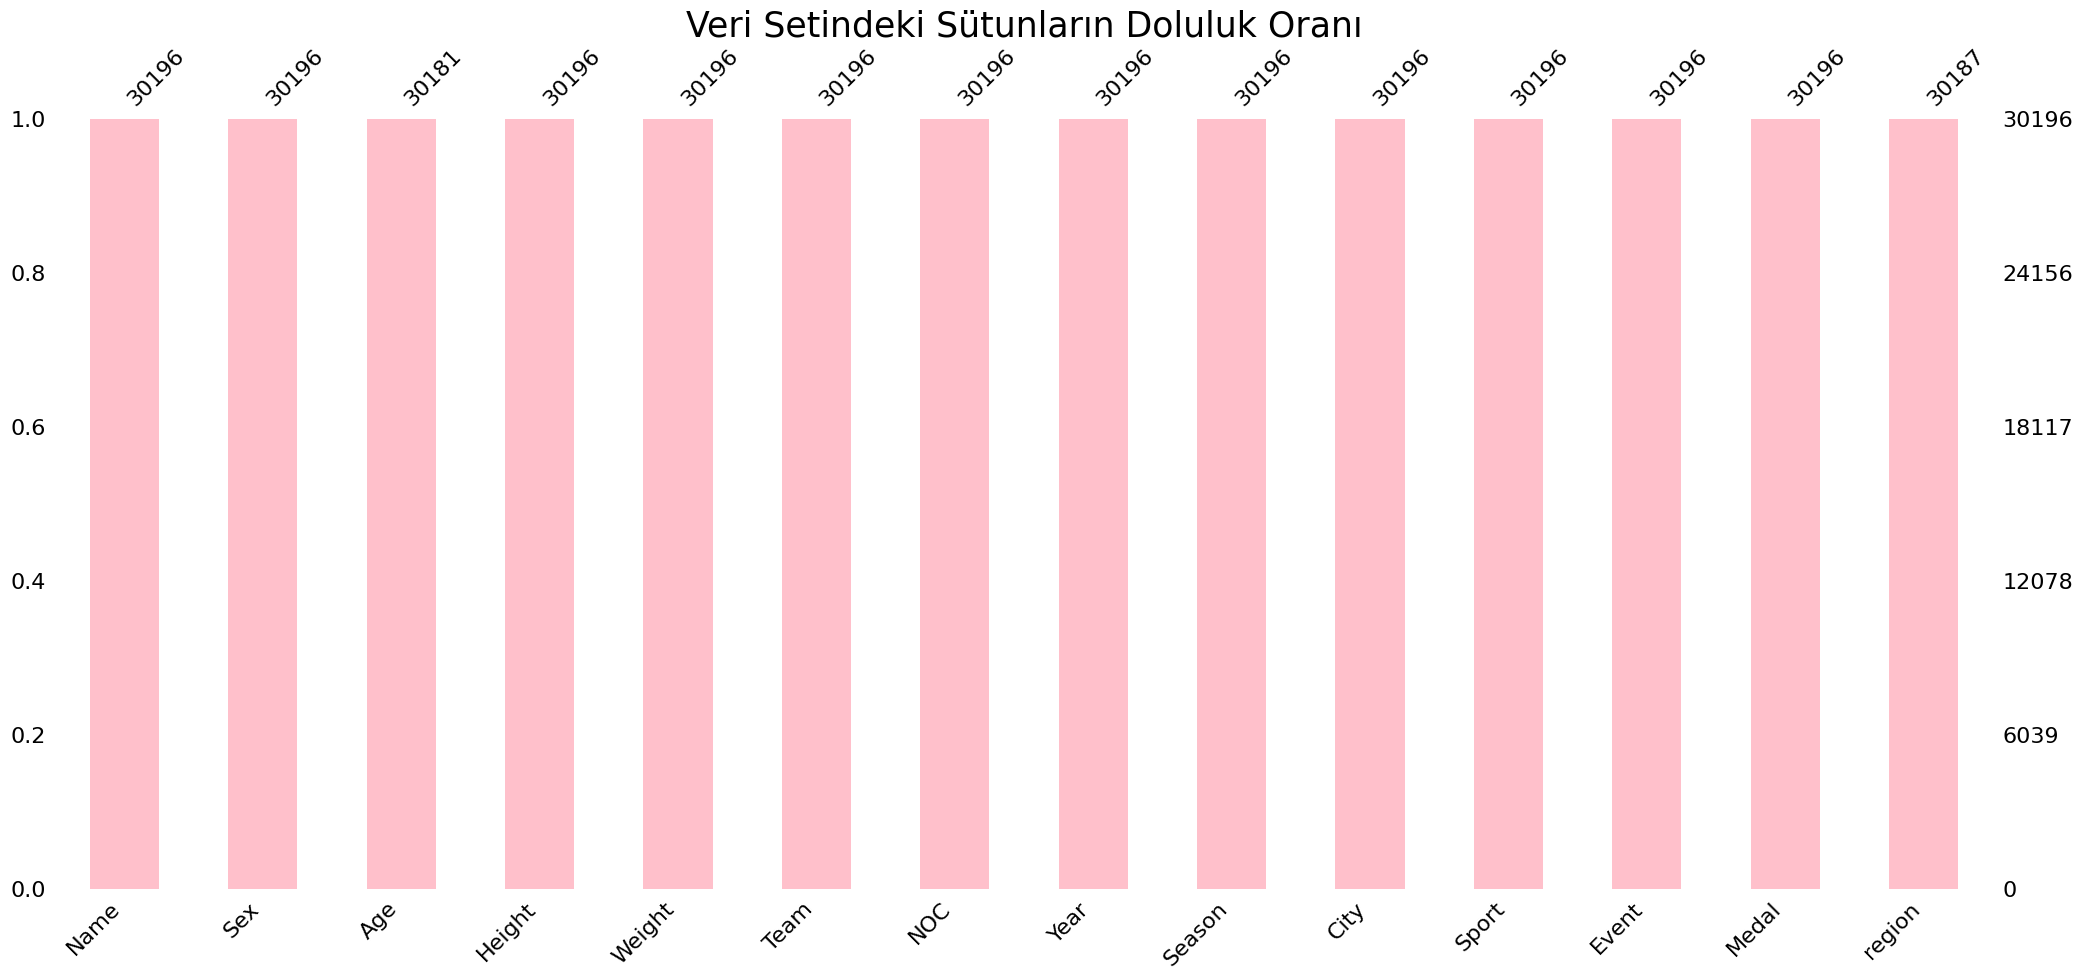

In [27]:
msn.bar(athletes_copy, color="pink")
plt.title("Veri Setindeki Sütunların Doluluk Oranı", fontsize=25)
plt.show()

* Kalan eksik verilerimiz çok bir fark etki yaratmayacağı için o değerler üzerinde artık bir işlem yapmayacağım.

* Artık verilerin analizi kısmına geçilebilir. :)

## Verilerin Analizi

#### **Veriler Arasındaki İlişki**

**Korelasyon Analizi:** 

Korelasyon katsayısının 0'a yaklaşması değişkenler arasında zayıf ilişkinin varlığını gösterir. 

Değişkenler birlikte artıyor veya azalıyorsa pozitif yönde;

Değişkenlerden biri artarken diğeri azalıyorsa ise negatif yönde bir ilişki vardır.

In [28]:
korelasyon = athletes_copy.corr()[:3]
korelasyon

C:\Users\Rüveyda\AppData\Local\Temp\ipykernel_31868\240922439.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  korelasyon = athletes_copy.corr()[:3]


,Age,Height,Weight,Year
Age,1.000000,0.095942,0.161750,0.103740
Height,0.095942,1.000000,0.801808,0.029651
Weight,0.161750,0.801808,1.000000,0.008513


Text(0.5, 1.0, 'Olimpiyat Verilerinin İlişkisel Analizi ')

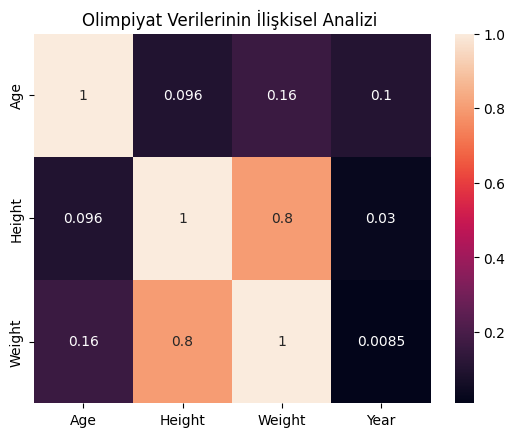

In [29]:
sns.heatmap(korelasyon,annot=True)
plt.title("Olimpiyat Verilerinin İlişkisel Analizi ")

**Pairplot():** İçe aktardığımız kütüphanelerden 'pairplot' yöntemini kullandığımızda bu yöntem, tüm veri seti içinde bulunan sayısal sütunlar için çift yönlü ilişkiler çizer.

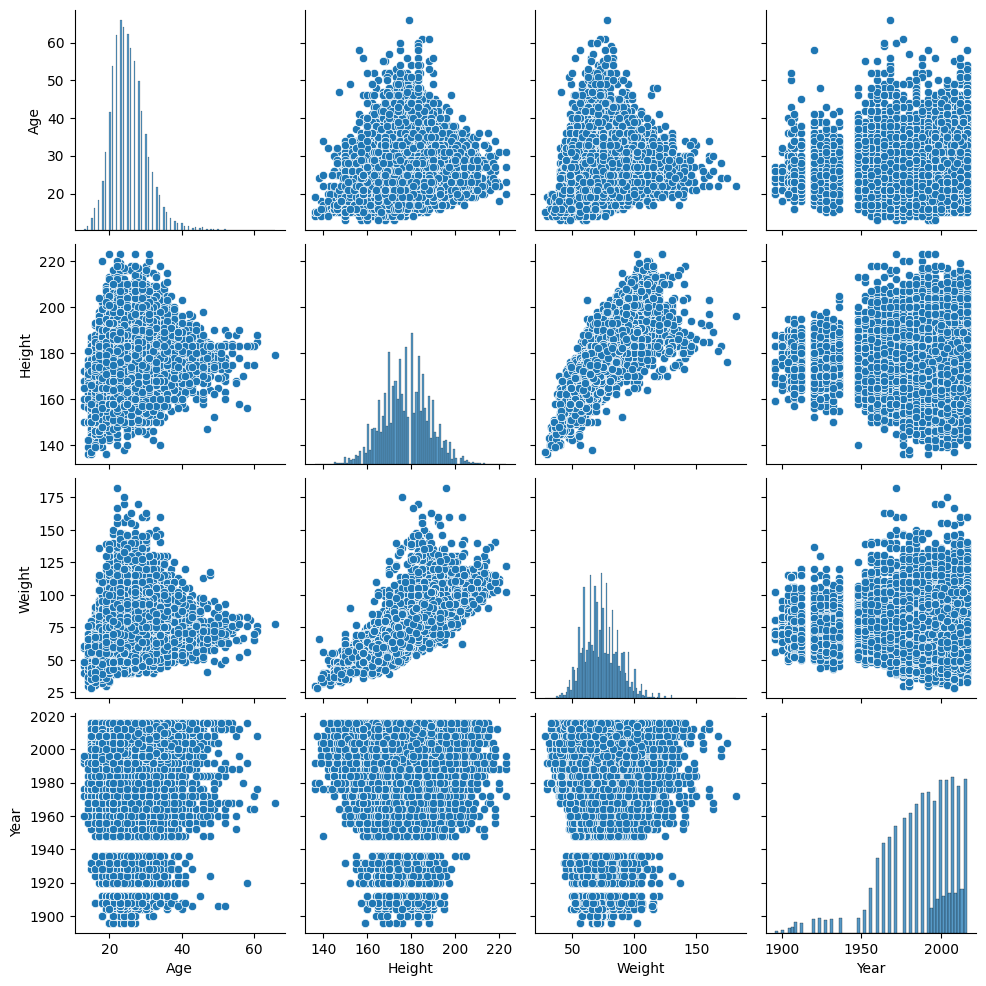

In [30]:
sns.pairplot(athletes_copy)

#### **1. Ülkelerin Kazandığı Altın Madalya Sayısı**

Veri setinde kendini tekrarlayan veriler kaldırılmadan ve madalya sütunundaki NaN değerlerin değiştirilmemiş haliyle, ülkelerin kazandığı toplam madalya sayısının analizi yapıldı. Eğer NaN değerleri doldursaydık çok aykırı madalya sayılarıyla dolu bir tablo oluyordu çünkü.

In [16]:
athletes_copy.groupby("region")["Medal"].count().reset_index().sort_values("Medal", ascending=False)

,region,Medal
191,USA,5637
151,Russia,3947
67,Germany,3756
190,UK,2067
63,France,1767
...,...,...
57,Equatorial Guinea,0
65,Gambia,0
71,Guam,0
141,Papua New Guinea,0


* Veri seti üzerinde temizleme ve kaldırma işleminin ardından yeniden ülkelerin kazandıkları toplam madalya durumuna bakıyoruz.

In [42]:
athletes_copy.groupby("region")["Medal"].count().reset_index().sort_values("Medal", ascending=False)

,region,Medal
122,USA,4385
97,Russia,3610
40,Germany,3189
4,Australia,1211
56,Italy,1061
...,...,...
99,Senegal,1
28,Djibouti,1
38,Gabon,1
32,Eritrea,1


* Olimpiyat verisinde ülkelerin 120 yıl içerisinde aldıkları madalyaların genel olarak toplamları, yukarıdaki tabloda büyükten küçüğe sıralanmış şekilde gösterilmektedir. Bunların hepsini göstermemiz görsel olarak yoracağı için ilk 25 ülkenin madalya sayısının görsel hali şu şekildedir;

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'USA'),
  Text(1, 0, 'Russia'),
  Text(2, 0, 'Germany'),
  Text(3, 0, 'Australia'),
  Text(4, 0, 'Italy'),
  Text(5, 0, 'Canada'),
  Text(6, 0, 'UK'),
  Text(7, 0, 'China'),
  Text(8, 0, 'France'),
  Text(9, 0, 'Japan'),
  Text(10, 0, 'Hungary'),
  Text(11, 0, 'Sweden'),
  Text(12, 0, 'Finland'),
  Text(13, 0, 'Netherlands'),
  Text(14, 0, 'Romania'),
  Text(15, 0, 'South Korea'),
  Text(16, 0, 'Poland'),
  Text(17, 0, 'Czech Republic'),
  Text(18, 0, 'Norway'),
  Text(19, 0, 'Serbia'),
  Text(20, 0, 'Brazil'),
  Text(21, 0, 'Spain'),
  Text(22, 0, 'Cuba'),
  Text(23, 0, 'Switzerland'),
  Text(24, 0, 'Bulgaria')])

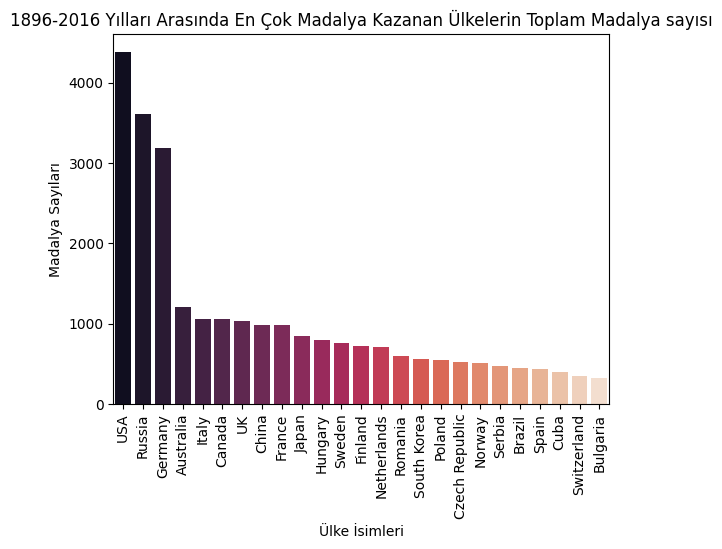

In [43]:
a = athletes_copy.groupby("region")["Medal"].count().nlargest(25).reset_index()
plt.title("1896-2016 Yılları Arasında En Çok Madalya Kazanan Ülkelerin Toplam Madalya sayısı")
sns.barplot(x= "region", y= "Medal", data=a, palette="rocket")
plt.xlabel("Ülke İsimleri")
plt.ylabel("Madalya Sayıları")
plt.xticks(rotation=90)

In [44]:
medalsByCountry=athletes_copy.groupby(["region", "Medal"]).size().reset_index()
medalsByCountry.columns=["region", "Medal", "count"]
medalsByCountry.pivot("region", "Medal", "count").fillna(0)

C:\Users\Rüveyda\AppData\Local\Temp\ipykernel_31868\2166586822.py:3: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  medalsByCountry.pivot("region", "Medal", "count").fillna(0)


Medal,Bronze,Gold,Silver
region,,,
Afghanistan,2.0,0.0,0.0
Algeria,6.0,5.0,4.0
Argentina,78.0,72.0,70.0
Armenia,8.0,2.0,5.0
Australia,477.0,319.0,415.0
...,...,...,...
Venezuela,10.0,2.0,3.0
Vietnam,0.0,1.0,3.0
"Virgin Islands, US",0.0,0.0,1.0


In [46]:
medalsByCountry_20=medalsByCountry.pivot("region", "Medal", "count").fillna(0).sort_values(["Gold"], ascending=False).head(20)
medalsByCountry_20

C:\Users\Rüveyda\AppData\Local\Temp\ipykernel_31868\2590448586.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  medalsByCountry_20=medalsByCountry.pivot("region", "Medal", "count").fillna(0).sort_values(["Gold"], ascending=False).head(20)


Medal,Bronze,Gold,Silver
region,,,
USA,982.0,2115.0,1288.0
Russia,1083.0,1465.0,1062.0
Germany,1072.0,1102.0,1015.0
Canada,355.0,362.0,343.0
China,291.0,351.0,347.0
UK,352.0,331.0,352.0
Australia,477.0,319.0,415.0
Italy,388.0,315.0,358.0
Hungary,274.0,289.0,228.0


In [45]:
goldMedal =athletes_copy[athletes_copy["Medal"]=="Gold"]
goldMedalCountry=goldMedal.groupby(["region", "Medal"]).size().reset_index()
goldMedalCountry.columns=["region", "Medal", "count"]
goldMedalCountry.pivot("region", "Medal", "count")

C:\Users\Rüveyda\AppData\Local\Temp\ipykernel_31868\2546735026.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  goldMedalCountry.pivot("region", "Medal", "count")


Medal,Gold
region,
Algeria,5
Argentina,72
Armenia,2
Australia,319
Austria,75
...,...
Uruguay,14
Uzbekistan,10
Venezuela,2


In [47]:
top25goldMedalCountry = goldMedalCountry.pivot("region", "Medal", "count").sort_values("Gold", ascending=False).head(25)
top25goldMedalCountry

C:\Users\Rüveyda\AppData\Local\Temp\ipykernel_31868\4038095301.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  top25goldMedalCountry = goldMedalCountry.pivot("region", "Medal", "count").sort_values("Gold", ascending=False).head(25)


Medal,Gold
region,
USA,2115
Russia,1465
Germany,1102
Canada,362
China,351
UK,331
Australia,319
Italy,315
Hungary,289


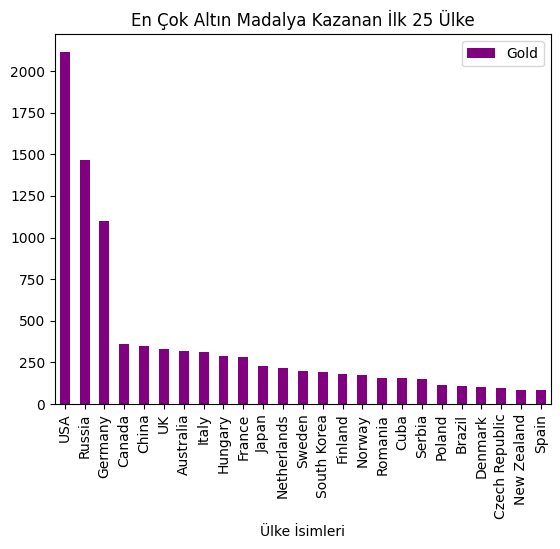

In [48]:
top25goldMedalCountry.plot(kind="bar", color="purple")
plt.xlabel("Ülke İsimleri")
plt.legend()
plt.title("En Çok Altın Madalya Kazanan İlk 25 Ülke")
plt.show()

#### **2. Yarışmacıların Kazandığı Madalya Sayısı**

In [31]:
athletes_copy.groupby("Name")["Medal"].count().reset_index()

,Name,Medal
0,"A. Joshua ""Josh"" West",1
1,Aage Birch,1
2,"Aagje ""Ada"" Kok (-van der Linden)",3
3,Aaron Brown,1
4,Aaron Egbele,1
...,...,...
20740,va Erds,1
20741,va Rakusz,2
20742,va Risztov,1
20743,ver Maximiliano David Banega,1


* En çok madalya kazanan ilk 25 katılımcıyı listeliyoruz.

In [32]:
a = athletes_copy.groupby("Name")["Medal"].count().nlargest(25).reset_index()
a

,Name,Medal
0,"Michael Fred Phelps, II",28
1,Larysa Semenivna Latynina (Diriy-),18
2,Nikolay Yefimovich Andrianov,15
3,Borys Anfiyanovych Shakhlin,13
4,Ole Einar Bjrndalen,13
5,Takashi Ono,13
6,Aleksey Yuryevich Nemov,12
7,Birgit Fischer-Schmidt,12
8,"Dara Grace Torres (-Hoffman, -Minas)",12
9,"Jennifer Elisabeth ""Jenny"" Thompson (-Cumpelik)",12


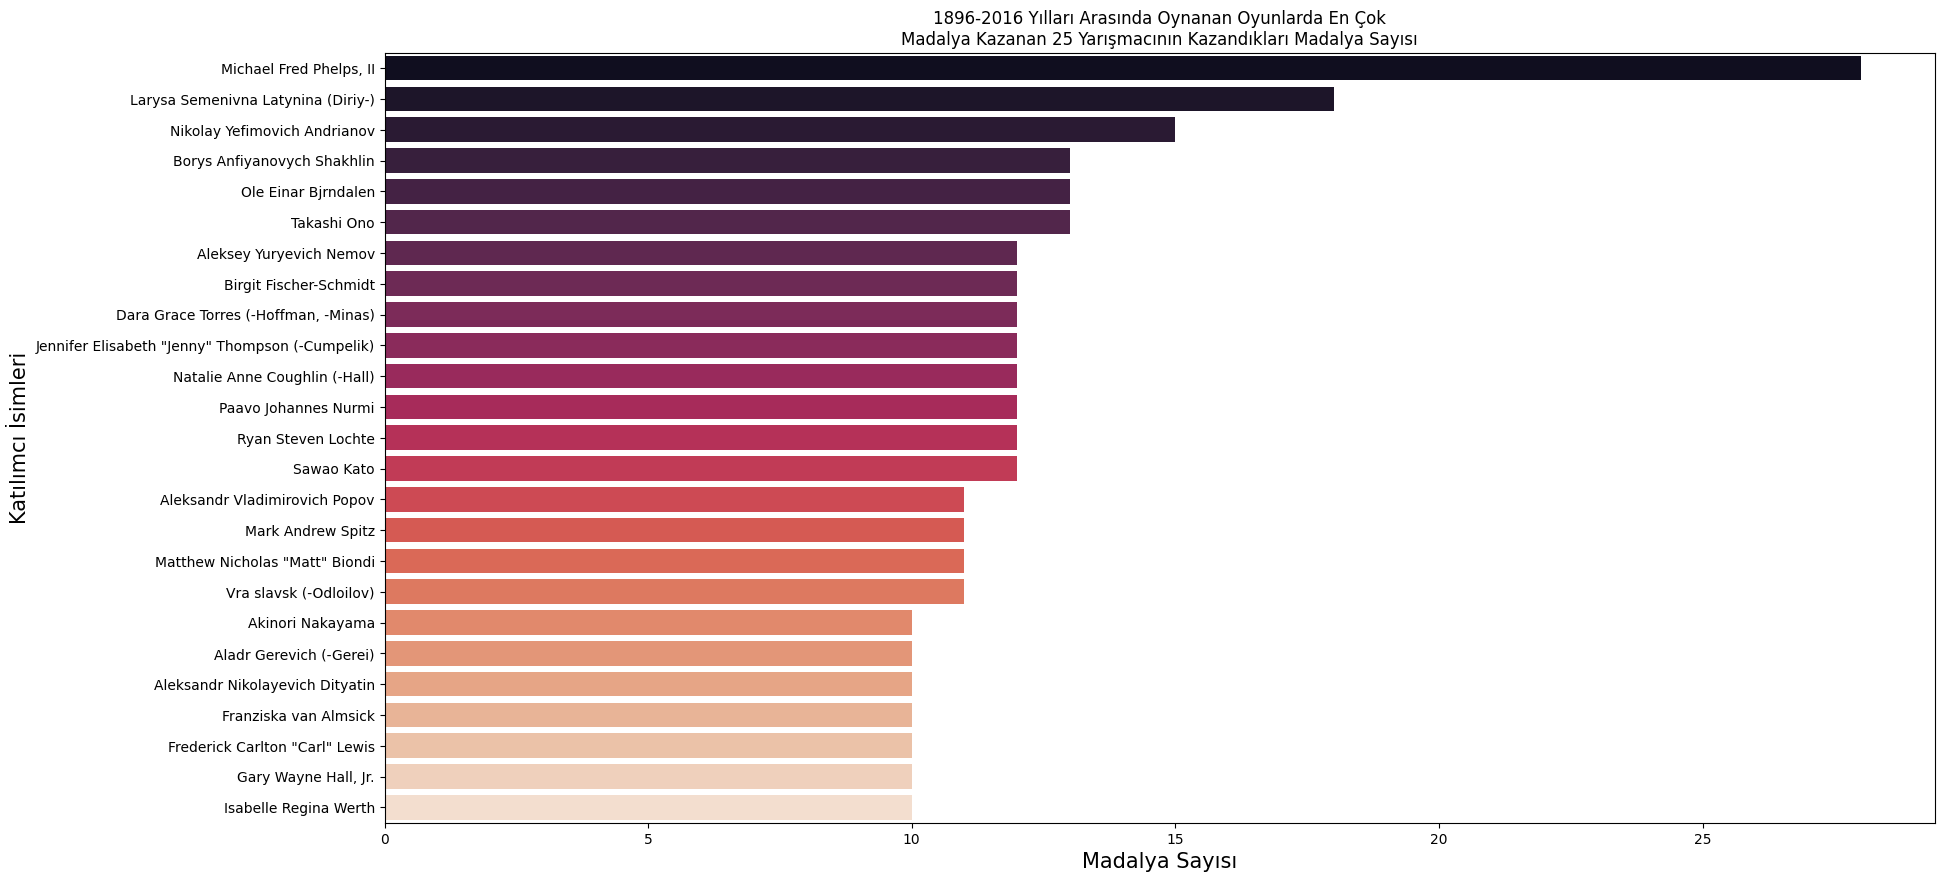

In [33]:
plt.figure(figsize=(20,10))
plt.title("1896-2016 Yılları Arasında Oynanan Oyunlarda En Çok\nMadalya Kazanan 25 Yarışmacının Kazandıkları Madalya Sayısı")
sns.barplot(x="Medal", y="Name", data=a, palette="rocket")
plt.xlabel("Madalya Sayısı", fontsize= 15)
plt.ylabel("Katılımcı İsimleri", fontsize= 15)
plt.show()

#### **3. Belli Bir Dalda Yarışan Sporcuların Boy-Kilo Ortalaması**

In [34]:
heightMean=athletes_copy[athletes_copy["Sport"]=="Figure Skating"].groupby("Name")["Height"].mean().reset_index()
weightMean=athletes_copy[athletes_copy["Sport"]=="Figure Skating"].groupby("Name")["Weight"].mean().reset_index()
ortalama = heightMean.merge(weightMean, on="Name", how="left")
ortalama.describe().T

,count,mean,std,min,25%,50%,75%,max
Height,178.0,168.511236,10.389716,145.0,160.0,168.0,177.0,193.0
Weight,178.0,60.202247,12.186108,36.0,50.0,58.0,72.0,86.0


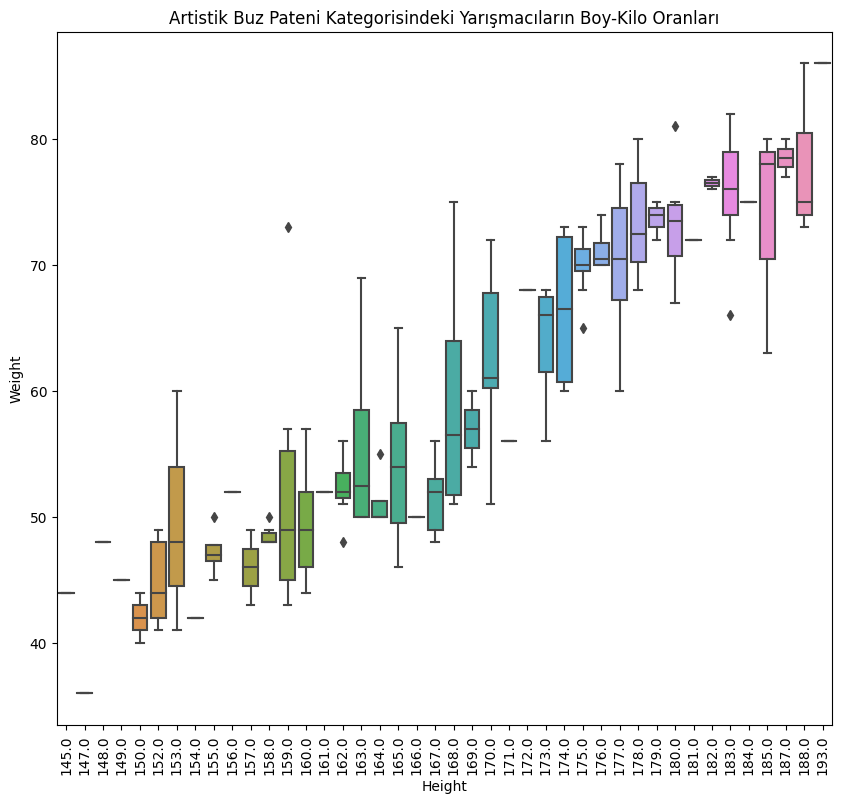

In [35]:
plt.figure(figsize=(10,9))
sns.boxplot(x="Height", y= "Weight", data=ortalama)
plt.title("Artistik Buz Pateni Kategorisindeki Yarışmacıların Boy-Kilo Oranları")
plt.xticks(rotation= 90)
plt.show()

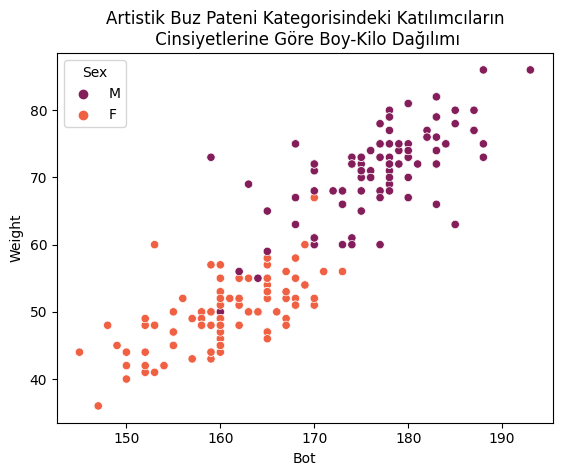

In [36]:
plt.title("Artistik Buz Pateni Kategorisindeki Katılımcıların\n Cinsiyetlerine Göre Boy-Kilo Dağılımı")
sns.scatterplot(x= "Height", y= "Weight", hue= "Sex", data=athletes_copy[athletes_copy["Sport"]=="Figure Skating"], palette="rocket")
plt.xlabel("Bot")
plt.show()

#### **4. Spor Dallarına Göre Kadın-Erkek Oranı**

In [37]:
men = athletes_copy[athletes_copy.Sex=="M"].groupby("Sport")["Name"].count().reset_index()
women = athletes_copy[athletes_copy.Sex=="F"].groupby("Sport")["Name"].count().reset_index()

final = men.merge(women, on="Sport", how="left")
final = final.fillna(0)
final.rename(columns={"Name_x":"Male","Name_y":"Female"}, inplace=True)
final

,Sport,Male,Female
0,Alpine Skiing,174,180.0
1,Archery,106,100.0
2,Art Competitions,2,0.0
3,Athletics,2414,1239.0
4,Badminton,81,73.0
5,Baseball,333,0.0
6,Basketball,610,390.0
7,Beach Volleyball,33,35.0
8,Biathlon,241,147.0
9,Bobsleigh,259,24.0


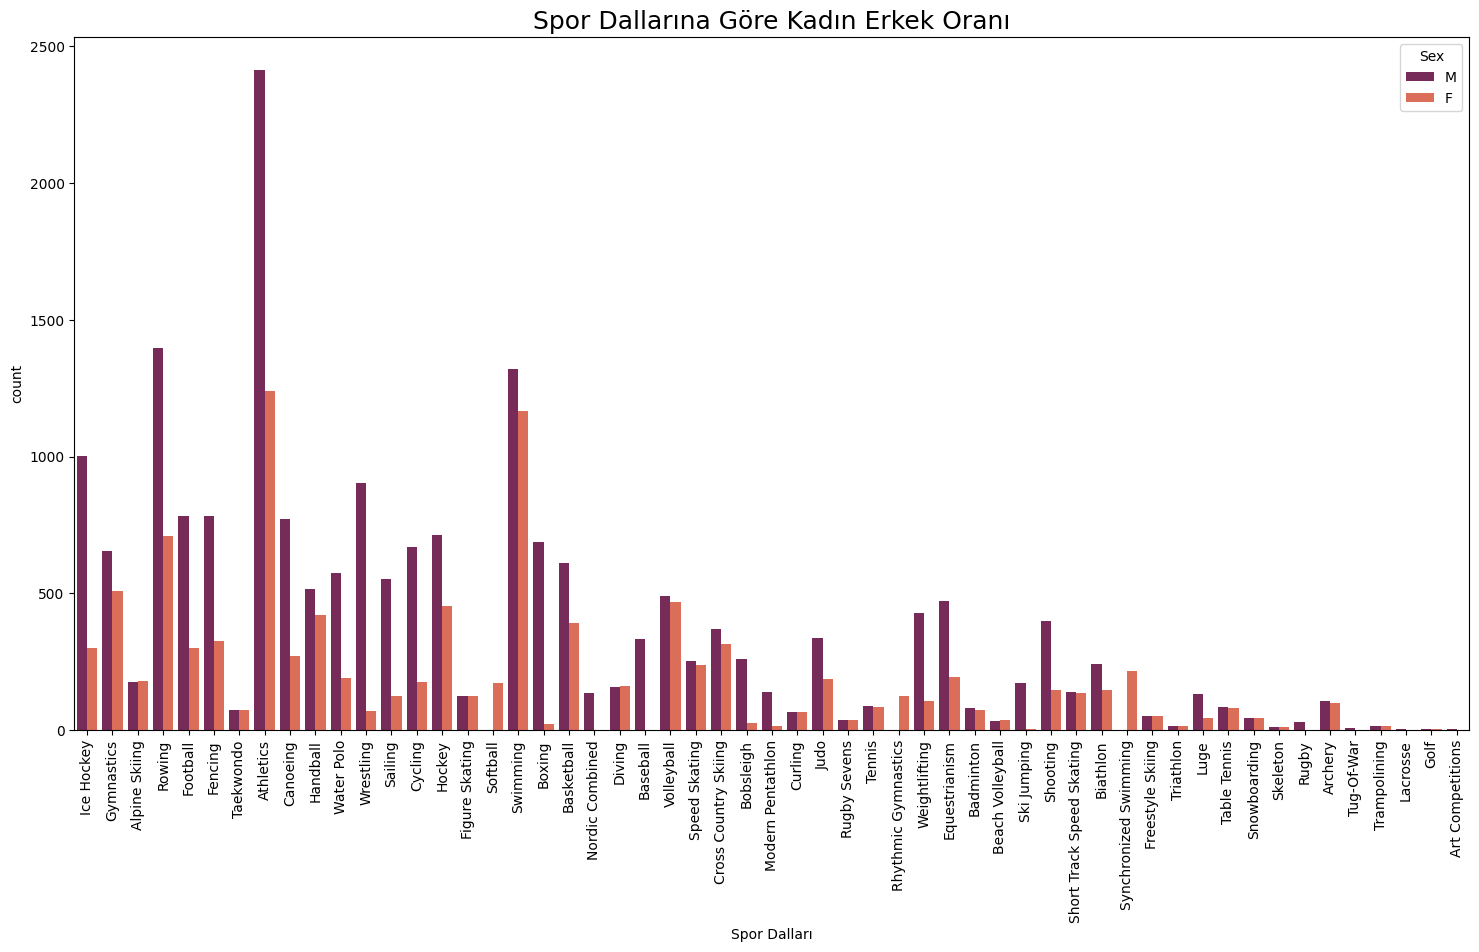

In [38]:
plt.figure(figsize=(18, 9))
sns.countplot(x="Sport", hue="Sex", data=athletes_copy, palette= "rocket")
plt.title("Spor Dallarına Göre Kadın Erkek Oranı", fontsize= 18)
plt.xlabel("Spor Dalları")
plt.xticks(rotation=90)
plt.show()

#### **5. Belli Bir Spor Dalında Katılımcıların Kazandığı Madalya Sayısı**

In [39]:
sportByMedal = athletes_copy.groupby("Sport")["Medal"].count().reset_index().sort_values("Medal", ascending=False)
print("Spor Dallarına Göre Kazanılan Madalya Sayısı:\n", sportByMedal)

Spor Dallarına Göre Kazanılan Madalya Sayısı:
                         Sport  Medal
3                   Athletics   3653
43                   Swimming   2487
32                     Rowing   2105
25                 Ice Hockey   1301
24                     Hockey   1168
22                 Gymnastics   1161
17                    Fencing   1109
19                   Football   1084
11                   Canoeing   1041
6                  Basketball   1000
54                  Wrestling    972
51                 Volleyball    958
23                   Handball    937
14                    Cycling    845
52                 Water Polo    764
10                     Boxing    709
12       Cross Country Skiing    687
35                    Sailing    677
16              Equestrianism    663
36                   Shooting    542
53              Weightlifting    534
26                       Judo    526
42              Speed Skating    488
8                    Biathlon    388
0               Alpine Skiin

In [40]:
def sporDalindaKazanilanMadalya(df, sport):
    dataCopy = df.dropna(subset=["Medal"])
    dataCopy = dataCopy[dataCopy.Sport==sport]
    
    x = dataCopy.Name.value_counts().reset_index().head(25).merge(athletes_copy,left_on="index",right_on="Name",how="left")[["index","Name_x","Sport","region"]].drop_duplicates("index")
    x.rename(columns={"index":"Name","Name_x":"Medals"},inplace=True)
    return x

In [41]:
sporDalindaKazanilanMadalya(athletes_copy, "Figure Skating") #Bu kategoride 25 katılımcı madalya kazanmış.

,Name,Medals,Sport,region
0,Yevgeny Viktorovich Plyushchenko,4,Figure Skating,Russia
4,"Irina Konstantinovna Rodnina (-Zaytseva, -Mink...",3,Figure Skating,Russia
7,"Charles Allen ""Charlie"" White, Jr.",3,Figure Skating,USA
10,Zhao Hongbo,3,Figure Skating,China
13,Tessa Jane Virtue (-McCormick),3,Figure Skating,Canada
16,Marina Vladimirovna Klimova (-Ponomarenko),3,Figure Skating,Russia
19,Meryl Elizabeth Davis,3,Figure Skating,USA
22,Artur Valeryevich Dmitriyev,3,Figure Skating,Russia
25,Shen Xue,3,Figure Skating,China
28,Sergey Vladilenovich Ponomarenko,3,Figure Skating,Russia


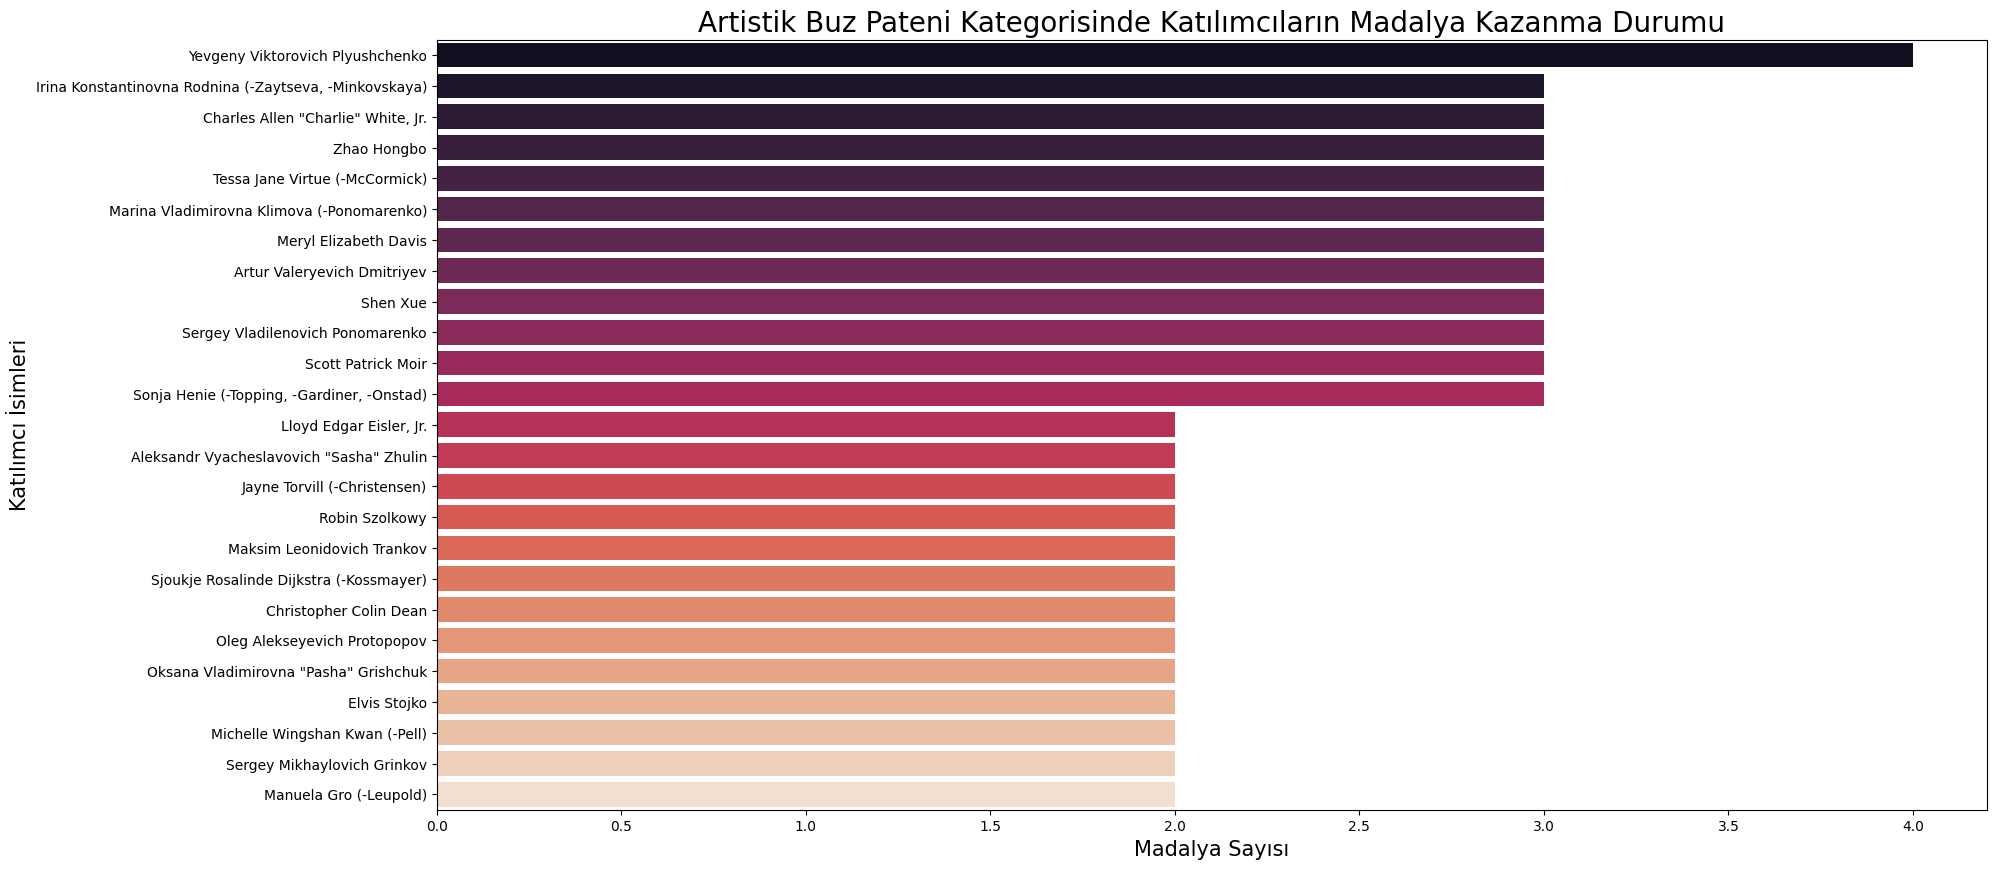

In [49]:
plt.figure(figsize=(20,10))
plt.title("Artistik Buz Pateni Kategorisinde Katılımcıların Madalya Kazanma Durumu", fontsize= 20)
sns.barplot(data=sporDalindaKazanilanMadalya(athletes_copy, "Figure Skating"), x="Medals", y="Name", palette="rocket")
plt.xlabel("Madalya Sayısı", fontsize= 15)
plt.ylabel("Katılımcı İsimleri", fontsize= 15)
plt.show()

#### **6. Yaz ve Kış Olimpiyatlarındaki Katılımcıları İnceleme**

* Olimpiyat verisindeki tüm madalya sayıları;

In [50]:
athletes_copy.Medal.value_counts()

Gold      10168
Bronze    10154
Silver     9874
Name: Medal, dtype: int64

In [51]:
#summer_olympics ve winter_olympics diye sadece yaz ve kış olimpiyatlarından oluşan 2 farklı veri seti oluşturduk.
summer_olympics = athletes_copy[athletes_copy.Season == "Summer"]
winter_olympics = athletes_copy[athletes_copy.Season == "Winter"]
summer_olympics.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
41,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland
42,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland
44,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland


In [52]:
winter_olympics.head(3)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
40,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland
60,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway
61,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Giant Slalom,Bronze,Norway


In [53]:
summer_olympics.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,25341.0,25.317391,5.121130,13.0,22.0,25.0,28.0,66.0
Height,25356.0,178.026542,11.251390,136.0,170.0,178.0,185.0,223.0
Weight,25356.0,73.936386,15.352556,28.0,63.0,73.0,83.0,182.0
Year,25356.0,1987.012699,23.489993,1896.0,1972.0,1992.0,2004.0,2016.0


In [54]:
winter_olympics.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,4840.0,26.013430,4.614373,13.0,23.0,26.0,29.0,50.0
Height,4840.0,175.611157,8.736152,145.0,170.0,176.0,182.0,201.0
Weight,4840.0,72.775826,12.988842,36.0,63.0,72.0,82.0,123.0
Year,4840.0,1993.049174,17.544136,1924.0,1984.0,1998.0,2006.0,2014.0


* Yaz olimpiyatlarında kazanılan toplam madalya sayıları;

In [55]:
summer_olympics.Medal.value_counts()

Bronze    8572
Gold      8543
Silver    8241
Name: Medal, dtype: int64

Text(0, 0.5, 'Madalya Sayıları')

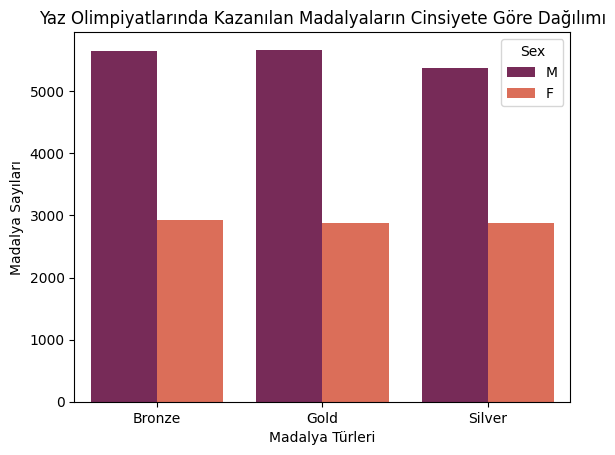

In [56]:
sns.countplot(x="Medal", hue="Sex", data=summer_olympics, palette="rocket")
plt.title("Yaz Olimpiyatlarında Kazanılan Madalyaların Cinsiyete Göre Dağılımı")
plt.xlabel("Madalya Türleri")
plt.ylabel("Madalya Sayıları")

Text(0, 0.5, 'Kilo')

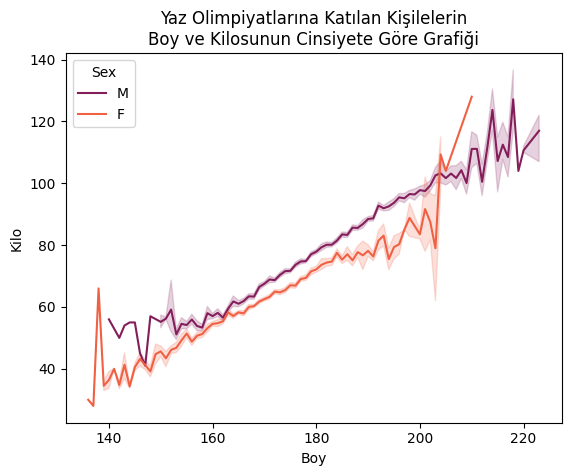

In [57]:
sns.lineplot(x= "Height", y= "Weight", hue= "Sex", data=summer_olympics, palette="rocket")
plt.title("Yaz Olimpiyatlarına Katılan Kişilelerin\nBoy ve Kilosunun Cinsiyete Göre Grafiği")
plt.xlabel("Boy")
plt.ylabel("Kilo")

Text(0, 0.5, 'Yaş')

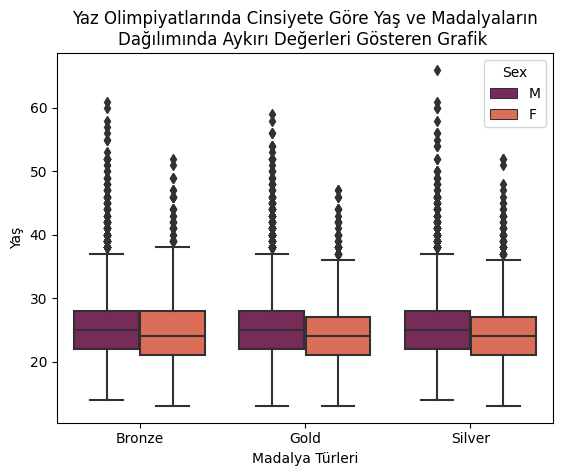

In [58]:
sns.boxplot(x= "Medal", y= "Age", hue= "Sex", data= summer_olympics, palette= "rocket")
plt.title("Yaz Olimpiyatlarında Cinsiyete Göre Yaş ve Madalyaların\nDağılımında Aykırı Değerleri Gösteren Grafik ")
plt.xlabel("Madalya Türleri")
plt.ylabel("Yaş")

* Kış olimpiyatlarında kazanılan toplam madalya sayıları;

In [59]:
winter_olympics.Medal.value_counts()

Silver    1633
Gold      1625
Bronze    1582
Name: Medal, dtype: int64

Text(0, 0.5, 'Madalya Sayıları')

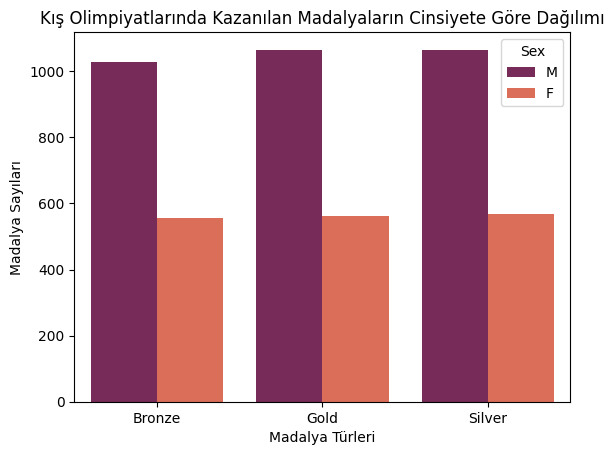

In [60]:
sns.countplot(x="Medal", hue="Sex", data=winter_olympics, palette="rocket")
plt.title("Kış Olimpiyatlarında Kazanılan Madalyaların Cinsiyete Göre Dağılımı")
plt.xlabel("Madalya Türleri")
plt.ylabel("Madalya Sayıları")

Text(0, 0.5, 'Kilo')

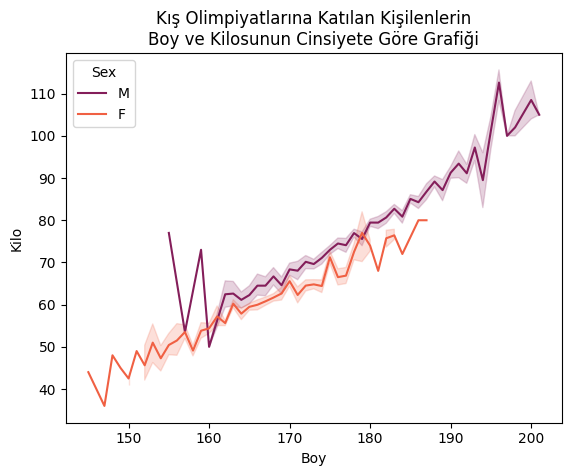

In [61]:
sns.lineplot(x= "Height", y= "Weight", hue= "Sex", data=winter_olympics, palette="rocket")
plt.title("Kış Olimpiyatlarına Katılan Kişilenlerin\nBoy ve Kilosunun Cinsiyete Göre Grafiği")
plt.xlabel("Boy")
plt.ylabel("Kilo")

Text(0, 0.5, 'Yaş')

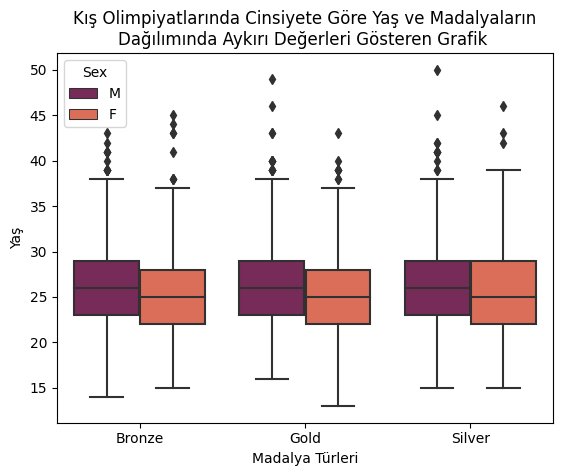

In [62]:
sns.boxplot(x= "Medal", y= "Age", hue= "Sex", data= winter_olympics, palette= "rocket")
plt.title("Kış Olimpiyatlarında Cinsiyete Göre Yaş ve Madalyaların\nDağılımında Aykırı Değerleri Gösteren Grafik ")
plt.xlabel("Madalya Türleri")
plt.ylabel("Yaş")

#### **7. Yıllara Göre Katılımcıların Cinsiyet Durumu**

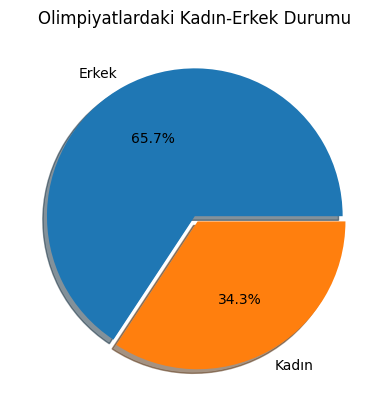

In [65]:
cinsiyetDurum = pd.DataFrame(athletes_copy["Sex"].value_counts().reset_index())
plt.title("Olimpiyatlardaki Kadın-Erkek Durumu")
plt.pie(data= cinsiyetDurum, x= "Sex", labels= ["Erkek","Kadın"], autopct= "%1.1f%%", shadow= True, explode=[0,0.04])
plt.show()

In [66]:
male = athletes_copy[athletes_copy.Sex=="M"].groupby("Year")["Name"].count().reset_index()
female = athletes_copy[athletes_copy.Sex=="F"].groupby("Year")["Name"].count().reset_index()
final = male.merge(female, on="Year", how="left")
final = final.fillna(0)
final.rename(columns={"Name_x":"Erkek","Name_y":"Kadın"}, inplace=True)
final

,Year,Erkek,Kadın
0,1896,20,0.0
1,1900,38,0.0
2,1904,60,0.0
3,1906,69,0.0
4,1908,138,0.0
5,1912,131,0.0
6,1920,182,1.0
7,1924,182,4.0
8,1928,150,20.0
9,1932,151,25.0


In [67]:
print(len(final))

35


In [68]:
men = athletes_copy[athletes_copy.Sex=="M"]
women = athletes_copy[athletes_copy.Sex=="F"]

Text(0, 0.5, 'Katılımcı Sayısı')

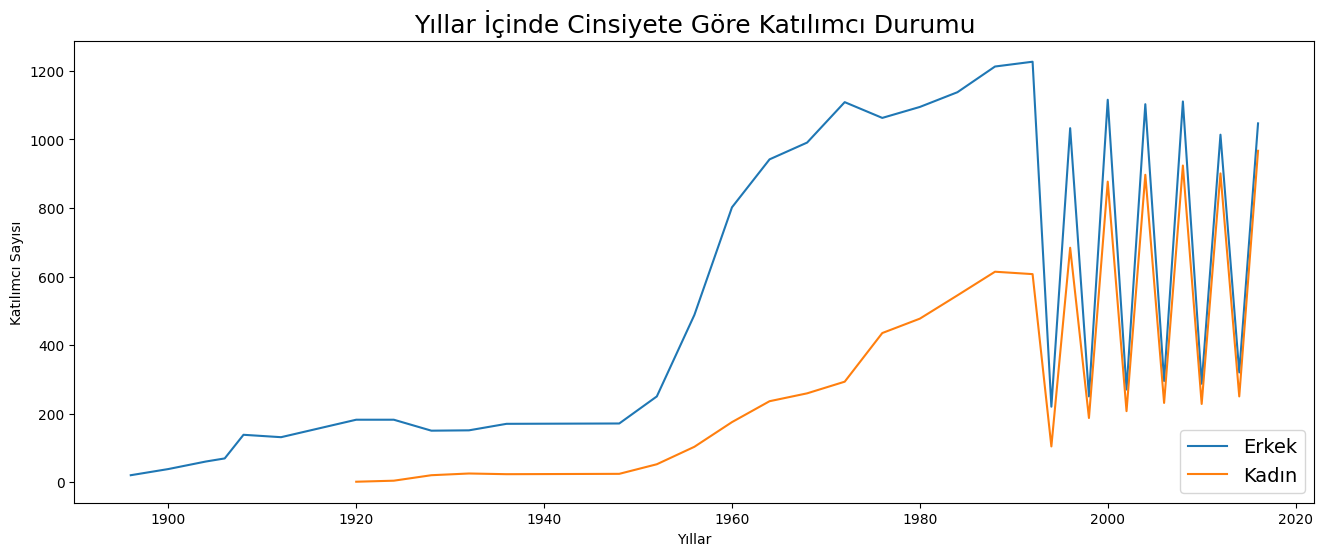

In [70]:
men.groupby("Year").Sex.count().plot.line(figsize=(16,6), label = "Erkek")
women.groupby("Year").Sex.count().plot.line(figsize=(16,6), label = "Kadın")
plt.title("Yıllar İçinde Cinsiyete Göre Katılımcı Durumu", fontsize=18)
plt.legend(loc=4,fontsize=14)
plt.xlabel("Yıllar")
plt.ylabel("Katılımcı Sayısı")

#### **8. Birkaç Farklı Filtreleme İşlemi**

* 18 yaşından küçük altın madalyaya sahip kaç katılımcı var?

In [71]:
athletes_copy[(athletes_copy["Age"]<18) & (athletes_copy["Medal"]=="Gold")] #344 katılımcı olduğunu görüyoruz.

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
2005,Lavinia Agache (-Carney),F,16.0,148.0,40.0,Romania,ROU,1984,Summer,Los Angeles,Gymnastics,Gymnastics Women's Team All-Around,Gold,Romania
4835,Margarita Sergeyevna Aliychuk,F,17.0,174.0,48.0,Russia,RUS,2008,Summer,Beijing,Rhythmic Gymnastics,Rhythmic Gymnastics Women's Group,Gold,Russia
5147,Lynne Marie Allsup (-Olson),F,15.0,163.0,59.0,United States,USA,1964,Summer,Tokyo,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA
5826,Simona Amnar (-Tabr),F,16.0,158.0,44.0,Romania,ROU,1996,Summer,Atlanta,Gymnastics,Gymnastics Women's Horse Vault,Gold,Romania
11779,Shirley Frances Babashoff,F,15.0,178.0,67.0,United States,USA,1972,Summer,Munich,Swimming,Swimming Women's 4 x 100 metres Freestyle Relay,Gold,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
267409,Stella Heorhivna Zakharova (-Khlus),F,17.0,146.0,42.0,Soviet Union,URS,1980,Summer,Moskva,Gymnastics,Gymnastics Women's Team All-Around,Gold,Russia
267581,Yelena Mikhaylovna Zamolodchikova,F,17.0,154.0,43.0,Russia,RUS,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Floor Exercise,Gold,Russia
267582,Yelena Mikhaylovna Zamolodchikova,F,17.0,154.0,43.0,Russia,RUS,2000,Summer,Sydney,Gymnastics,Gymnastics Women's Horse Vault,Gold,Russia
268602,Klaus Zerta,M,13.0,165.0,48.0,Germany,GER,1960,Summer,Roma,Rowing,Rowing Men's Coxed Pairs,Gold,Germany


* Olimpiyat verisi içinde kaç tane Türkiye'den katılan katılımcı var?

In [72]:
teamTur = athletes_copy[athletes_copy["Team"]=="Turkey"]
len(teamTur)

72

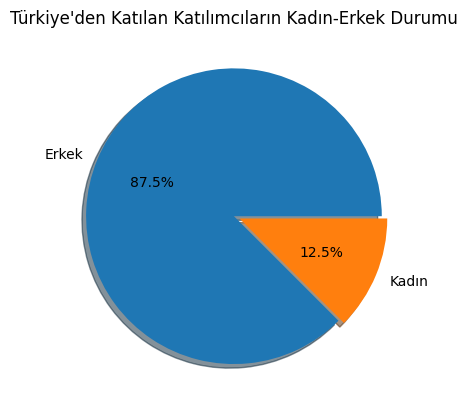

In [73]:
cinsiyetTurkey= pd.DataFrame(teamTur["Sex"].value_counts().reset_index())
plt.title("Türkiye'den Katılan Katılımcıların Kadın-Erkek Durumu")
plt.pie(data= cinsiyetTurkey, x= "Sex", labels= ["Erkek","Kadın"], autopct= "%1.1f%%", shadow= True, explode=[0,0.04])
plt.show()

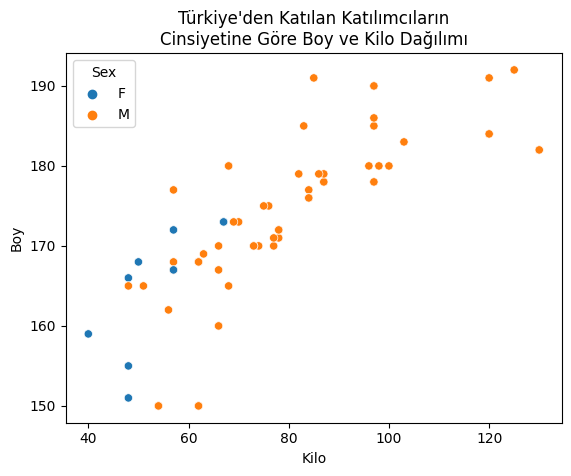

In [74]:
sns.scatterplot(x = "Weight", y = "Height", hue = "Sex", data = teamTur)
plt.title("Türkiye'den Katılan Katılımcıların\nCinsiyetine Göre Boy ve Kilo Dağılımı")
plt.xlabel("Kilo")
plt.ylabel("Boy")
plt.show()

In [77]:
weightlifting = teamTur[teamTur["Sport"]<="Weightlifting"] 
weightlifting

Türkiye'den olimpiyatlara 'Weightlifting' (Ağırlık Kaldırma-Halter Kaldırma) kategorisinde 30 katılımcı olmuştur.


,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
747,Elvan Abeylegesse,F,25.0,159.0,40.0,Turkey,TUR,2008,Summer,Beijing,Athletics,"Athletics Women's 5,000 metres",Silver,Turkey
8491,Eref Apak,M,22.0,184.0,120.0,Turkey,TUR,2004,Summer,Athina,Athletics,Athletics Men's Hammer Throw,Bronze,Turkey
8668,Reyhan Arabacolu,M,21.0,170.0,77.0,Turkey,TUR,2004,Summer,Athina,Weightlifting,Weightlifting Men's Middleweight,Bronze,Turkey
9845,Sedat Artu,M,28.0,162.0,56.0,Turkey,TUR,2004,Summer,Athina,Weightlifting,Weightlifting Men's Bantamweight,Bronze,Turkey
11441,Turgut Ayka,M,26.0,168.0,57.0,Turkey,TUR,1984,Summer,Los Angeles,Boxing,Boxing Men's Featherweight,Bronze,Turkey
21121,Malik Beylerolu,M,26.0,175.0,75.0,Turkey,TUR,1996,Summer,Atlanta,Boxing,Boxing Men's Middleweight,Silver,Turkey
21699,Hamide Bkn (-Tosun),F,22.0,167.0,57.0,Turkey,TUR,2000,Summer,Sydney,Taekwondo,Taekwondo Women's Featherweight,Bronze,Turkey
31921,Gamze Bulut,F,19.0,166.0,48.0,Turkey,TUR,2012,Summer,London,Athletics,"Athletics Women's 1,500 metres",Silver,Turkey
33626,Asl akr (-Alptekin),F,26.0,168.0,50.0,Turkey,TUR,2012,Summer,London,Athletics,"Athletics Women's 1,500 metres",Gold,Turkey
34592,Eyp Can,M,19.0,165.0,51.0,Turkey,TUR,1984,Summer,Los Angeles,Boxing,Boxing Men's Flyweight,Bronze,Turkey


In [76]:
print(f"Türkiye'den olimpiyatlara 'Weightlifting' (Ağırlık Kaldırma-Halter Kaldırma) kategorisinde {len(weightlifting)} katılımcı olmuştur.")

Türkiye'den olimpiyatlara 'Weightlifting' (Ağırlık Kaldırma-Halter Kaldırma) kategorisinde 30 katılımcı olmuştur.


* SSCB dağılmadan katılımcıların katıldığı olimpiyat oyunları en yakın tarihten geçmişe doğru sıralanmıştır.

In [78]:
athletes_copy[(athletes_copy["NOC"]=="URS")].sort_values("Year", ascending=False)

,Name,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal,region
113712,Larysa Oleksandrivna Karlova,F,30.0,176.0,67.0,Soviet Union,URS,1988,Summer,Seoul,Handball,Handball Women's Handball,Bronze,Russia
265093,Vadym Maksymovych Yaroshchuk,M,22.0,181.0,80.0,Soviet Union,URS,1988,Summer,Seoul,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Bronze,Russia
123321,Mykola Anatoliyovych Komarov,M,27.0,198.0,105.0,Soviet Union,URS,1988,Summer,Seoul,Rowing,Rowing Men's Coxed Eights,Silver,Russia
250455,Oleg Kimovich Vasilyev,M,28.0,170.0,72.0,Soviet Union-2,URS,1988,Winter,Calgary,Figure Skating,Figure Skating Mixed Pairs,Silver,Russia
86840,Elina Aleksandrovna Guseva,F,24.0,183.0,67.0,Soviet Union,URS,1988,Summer,Seoul,Handball,Handball Women's Handball,Bronze,Russia
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41454,Aleksandra Georgiyevna Chudina,F,28.0,188.0,73.0,Soviet Union,URS,1952,Summer,Helsinki,Athletics,Athletics Women's Javelin Throw,Silver,Russia
231819,Vladimir Georgiyevich Sukharev,M,28.0,179.0,76.0,Soviet Union,URS,1952,Summer,Helsinki,Athletics,Athletics Men's 4 x 100 metres Relay,Silver,Russia
247504,Maigonis Valdmanis,M,18.0,180.0,75.0,Soviet Union,URS,1952,Summer,Helsinki,Basketball,Basketball Men's Basketball,Silver,Russia
41453,Aleksandra Georgiyevna Chudina,F,28.0,188.0,73.0,Soviet Union,URS,1952,Summer,Helsinki,Athletics,Athletics Women's Long Jump,Silver,Russia
